In [1]:
import os
import sys
import time
from datetime import datetime
import joblib
import numpy as np
import pandas as pd
from pathlib import Path
current_dir = Path()
os.chdir(Path())
from mlop import mlop
sys.path.append(os.path.join(current_dir,'train_data'))
sys.path.append(os.path.join(
    current_dir,
    'historical_data',
    'historical_generation'))
pd.set_option("display.max_columns",None)
pd.options.display.float_format = '{:.5f}'.format

train_start = time.time()
train_start_datetime = datetime.fromtimestamp(train_start)
train_start_tag = train_start_datetime.strftime('%c')

print("\n"+"#"*18+"\n# training start #\n"+
      "#"*18+"\n"+f"\n{train_start_tag}\n")


##################
# training start #
##################

Wed Oct  9 16:16:53 2024




pricing settings:
Actual/365 (Fixed) day counter
New York stock exchange calendar
compounding: continuous
frequency: annual


importing dataset(s)...



loading: 100%|███████████████████████████████████████████████████████████████████████| 898/898 [00:17<00:00, 52.55it/s]



preparing data...


         spot_price  strike_price       barrier  days_to_maturity  \
count 4737913.00000 4737913.00000 4737913.00000     4737913.00000   
mean     1390.46310    1389.46118    1390.36905         330.33480   
min       898.80000     808.92000     449.40000          60.00000   
25%      1314.51000    1296.62073    1020.06890          90.00000   
50%      1407.53000    1395.88971    1384.02000         360.00000   
75%      1489.55000    1494.19949    1734.97500         540.00000   
max      1565.18000    1721.69800    2347.77000         720.00000   
std       123.75814     148.02899     448.71885         241.58146   

       barrier_price        rebate  dividend_rate  risk_free_rate  \
count  4737913.00000 4737913.00000  4737913.00000   4737913.00000   
mean        54.04153       0.00000        0.02079         0.04000   
min          0.00000       0.00000        0.01780         0.04000   
25%          2.57970       0.00000        0.01881         0.04000   
50%         

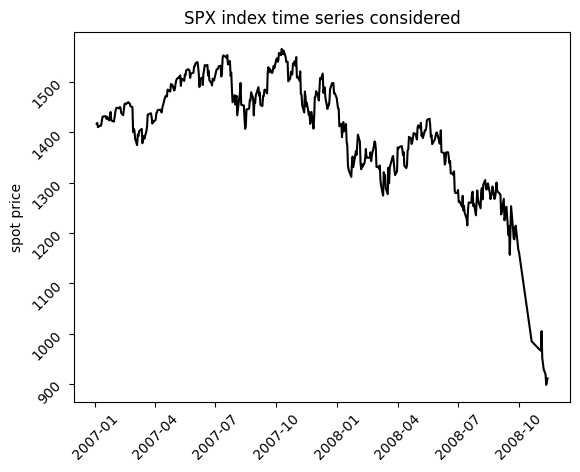

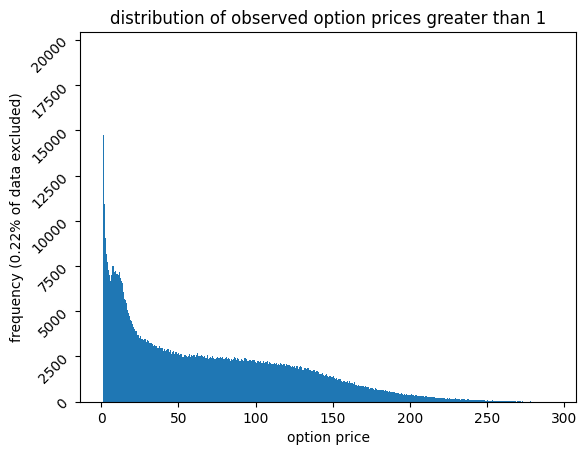

test size: 1.0%
random state: None
maximum iterations: 1000

target: 
observed_price

features: 
['spot_price', 'strike_price', 'days_to_maturity', 'risk_free_rate', 'dividend_rate', 'kappa', 'theta', 'rho', 'eta', 'v0', 'barrier', 'barrier_type_name', 'w']

feature transformer(s):
('StandardScaler', StandardScaler(), ['spot_price', 'strike_price', 'days_to_maturity', 'risk_free_rate', 'dividend_rate', 'kappa', 'theta', 'rho', 'eta', 'v0', 'barrier'])

('OneHotEncoder', OneHotEncoder(sparse_output=False), ['barrier_type_name', 'w'])

target transformer(s):
StandardScaler()



<Figure size 640x480 with 0 Axes>

In [2]:
from HDF_collection import contracts

dataset = contracts.copy()
mlop = mlop(user_dataset = dataset)

In [3]:
"""
manual filtering
"""
dataset = dataset[dataset['outin']=='Out']

# leave a space or other separator in front
file_tag_addon = " OnlyOuts"
pd.options.display.float_format = '{:.5f}'.format
dataset

,spot_price,strike_price,barrier,days_to_maturity,barrier_price,updown,outin,w,barrier_type_name,rebate,dividend_rate,risk_free_rate,theta,kappa,rho,eta,v0,calculation_date,expiration_date,observed_price
0,1416.59000,1274.93100,708.29500,60,0.48509,Down,Out,put,DownOut,0.00000,0.01812,0.04000,0.08296,0.23344,-1.00000,0.09850,0.01066,2007-01-03,2007-03-04,0.76023
1,1416.59000,1274.93100,881.82727,60,0.47965,Down,Out,put,DownOut,0.00000,0.01812,0.04000,0.08296,0.23344,-1.00000,0.09850,0.01066,2007-01-03,2007-03-04,0.38989
2,1416.59000,1274.93100,1055.35955,60,0.47592,Down,Out,put,DownOut,0.00000,0.01812,0.04000,0.08296,0.23344,-1.00000,0.09850,0.01066,2007-01-03,2007-03-04,0.75558
3,1416.59000,1274.93100,1228.89182,60,0.15441,Down,Out,put,DownOut,0.00000,0.01812,0.04000,0.08296,0.23344,-1.00000,0.09850,0.01066,2007-01-03,2007-03-04,0.21664
6,1416.59000,1345.76050,708.29500,60,4.32304,Down,Out,put,DownOut,0.00000,0.01812,0.04000,0.08296,0.23344,-1.00000,0.09850,0.01066,2007-01-03,2007-03-04,4.22454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737903,911.39000,1002.52900,1367.08500,90,31.65939,Up,Out,call,UpOut,0.00000,0.03124,0.04000,0.11726,2.76426,-0.99994,0.27158,0.29163,2008-11-13,2009-02-11,31.19705
4737905,911.39000,1002.52900,1367.08500,180,26.75114,Up,Out,call,UpOut,0.00000,0.03124,0.04000,0.11726,2.76426,-0.99994,0.27158,0.29163,2008-11-13,2009-05-12,26.56977
4737907,911.39000,1002.52900,1367.08500,360,18.45184,Up,Out,call,UpOut,0.00000,0.03124,0.04000,0.11726,2.76426,-0.99994,0.27158,0.29163,2008-11-13,2009-11-08,18.46598
4737909,911.39000,1002.52900,1367.08500,540,13.51376,Up,Out,call,UpOut,0.00000,0.03124,0.04000,0.11726,2.76426,-0.99994,0.27158,0.29163,2008-11-13,2010-05-07,13.47098


In [4]:
"""
random train/test split
"""
train_data, train_X, train_y, \
    test_data, test_X, test_y = mlop.split_user_data()
""""""

''

In [5]:
"""
manual train/test split
"""
unique_dates = dataset['calculation_date'].sort_values(
    ascending=True).unique().tolist()
filter_date = unique_dates[int(0.9*len(unique_dates))]

train_data = dataset[
    (
      # (dataset['calculation_date']>=datetime(2007,1,1))
      #  &
        (dataset['calculation_date']<=filter_date)
      )].copy()

test_data = dataset[
    (
      (dataset['calculation_date']>filter_date)
      # &
      # (dataset['calculation_date']<=datetime(2012,12,31))
      )].copy()



In [6]:
"""
preprocessing
"""
train_X, train_y, test_X, test_y = mlop.split_data_manually(
    train_data, test_data)
preprocessor = mlop.preprocess()
train_data.describe()

,spot_price,strike_price,barrier,days_to_maturity,barrier_price,rebate,dividend_rate,risk_free_rate,theta,kappa,rho,eta,v0,calculation_date,expiration_date,observed_price
count,2020864.00000,2020864.00000,2020864.00000,2020864.00000,2020864.00000,2020864.00000,2020864.00000,2020864.00000,2020864.00000,2020864.00000,2020864.00000,2020864.00000,2020864.00000,2020864,2020864,2020864.00000
mean,1426.30093,1426.30093,1426.30422,324.91450,65.80573,0.00000,0.02012,0.04000,0.04820,2.13553,-0.96119,0.19837,0.04014,2007-12-01 12:21:55.625792256,2008-10-21 10:18:48.591335168,65.80742
min,1214.91000,1093.41900,607.45500,60.00000,0.00023,0.00000,0.01780,0.04000,0.01992,0.03970,-1.00000,0.08818,0.00524,2007-01-03 00:00:00,2007-03-04 00:00:00,0.00000
25%,1360.00000,1341.06653,1042.55300,90.00000,14.80482,0.00000,0.01866,0.04000,0.03824,1.13366,-1.00000,0.15360,0.02409,2007-08-03 00:00:00,2008-03-15 00:00:00,14.80676
50%,1445.28000,1424.25735,1430.56400,180.00000,53.32838,0.00000,0.01944,0.04000,0.05274,1.75118,-1.00000,0.17385,0.03853,2007-11-29 00:00:00,2008-09-21 00:00:00,53.33048
75%,1503.06000,1514.88663,1811.15078,540.00000,106.93627,0.00000,0.02163,0.04000,0.05665,2.27834,-1.00000,0.20080,0.05330,2008-04-07 00:00:00,2009-05-26 00:00:00,106.93583
max,1565.18000,1721.69800,2347.77000,720.00000,292.97177,0.00000,0.02406,0.04000,0.40505,12.32603,-0.27661,1.45769,0.13501,2008-08-11 00:00:00,2010-08-01 00:00:00,293.06293
std,86.72496,120.95533,459.30005,241.51369,56.91383,0.00000,0.00165,0.00000,0.01489,1.70883,0.13097,0.13079,0.01997,NaN,NaN,56.91204


In [7]:
print(f"\n{train_data.dtypes}")
test_train_ratio = test_data.describe(
    ).iloc[0,0]/train_data.describe().iloc[0,0]
print(f"\ntrain/test: {int(round((1-test_train_ratio)*100,0))}/"
      +str(int(round(test_train_ratio*100,0))))


spot_price                  float64
strike_price                float64
barrier                     float64
days_to_maturity              int64
barrier_price               float64
updown                       object
outin                        object
w                            object
barrier_type_name            object
rebate                      float64
dividend_rate               float64
risk_free_rate              float64
theta                       float64
kappa                       float64
rho                         float64
eta                         float64
v0                          float64
calculation_date     datetime64[ns]
expiration_date      datetime64[ns]
observed_price              float64
dtype: object

train/test: 83/17


In [ ]:
model_fit, runtime, specs = mlop.run_dnn(preprocessor,train_X,train_y)
train_end = time.time()
train_runtime = train_end-train_start


training...

Deep Neural Network
hidden layers sizes: (13, 13, 13)
learning rate: constant
activation: relu
solver: sgd
alpha: 0.0001


In [ ]:
test_data.describe()

In [ ]:
insample, outsample, errors = mlop.test_prediction_accuracy(
        model_fit,
        test_data,
        train_data
        )

In [ ]:
def save_model():
    S = np.sort(train_data['spot_price'].unique())
    K = np.sort(train_data['strike_price'].unique())
    T = np.sort(train_data['days_to_maturity'].unique())
    W = np.sort(train_data['w'].unique())
    n_calls = train_data[train_data['w']=='call'].shape[0]
    n_puts = train_data[train_data['w']=='put'].shape[0]
    train_end_tag = str(datetime.fromtimestamp(
        train_end).strftime("%Y_%m_%d %H-%M-%S"))
    file_tag = str(train_end_tag + " " + specs[0] + file_tag_addon)
    os.chdir(os.path.join(current_dir,'trained_models'))
    files_dir = os.path.join(
        current_dir,'trained_models','trained_models',
        file_tag)
    os.mkdir(files_dir)
    
    file_dir = os.path.join(files_dir,file_tag)
    
    insample.to_csv(f"{file_dir} insample.csv")
    outsample.to_csv(f"{file_dir} outsample.csv")
    joblib.dump(model_fit,str(f"{file_dir}.pkl"))
    pd.set_option("display.max_columns",None)
    with open(f'{file_dir}.txt', 'w') as file:
        file.write(train_start_tag)
        file.write(f"\nspot(s):\n{S}")
        file.write(f"\n\nstrikes:\n{K}\n")
        file.write(f"\nmaturities:\n{T}\n")
        file.write(f"\ntypes:\n{W}\n")
        try:
            file.write(f"\n{train_data['barrier_type_name'].unique()}")
        except Exception:
            pass
        file.write("")
        file.write(f"\nnumber of calls, puts:\n{n_calls},{n_puts}\n")
        file.write(f"\ntotal prices:\n{train_data.shape[0]}\n")
        for spec in specs:
            file.write(f"{spec}\n")
        file.write("#"*17+"\n# training data #\n"+"#"*17+
              f"\n{train_data.describe()}\n")
        file.write("#"*13+"\n# test data #\n"+"#"*13+
              f"\n{test_data.describe()}\n")
        file.write(f"\n{dataset.dtypes}")
        file.write(
            f"\nin sample results:"
            f"\n     RMSE: {errors['insample_RMSE']}"
            f"\n     MAE: {errors['insample_MAE']}\n"
            f"\nout of sample results:"
            f"\n     RMSE: {errors['outofsample_RMSE']}"
            f"\n     MAE: {errors['outofsample_MAE']}\n"
            )
        file.write("\nfeatures:\n")
        for feature in mlop.feature_set:
            file.write(f"     {feature}\n")
        file.write(f"\ntarget: {mlop.target_name}\n")
        file.write(f"\ncpu: {train_runtime}\n")
        file.write(datetime.fromtimestamp(train_end).strftime('%c'))
    pd.reset_option("display.max_columns")